Практическая работа 2 - Атаманчук А.В. КВБО-01-22

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('S02-hw-dataset.csv')
df.head()

,user_id,age,country,purchases,revenue
0,1,25.0,FR,7,749
1,2,24.0,RU,5,1115
2,3,52.0,FR,7,399
3,4,31.0,RU,6,654
4,5,NaN,DE,6,1296


In [2]:
df.info()
print('\nПолучена информация о столбцах и типах данных, которые в них используются')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   user_id    41 non-null     int64  
 1   age        39 non-null     float64
 2   country    41 non-null     object 
 3   purchases  41 non-null     int64  
 4   revenue    41 non-null     int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 1.7+ KB

Получена информация о столбцах и типах данных, которые в них используются


In [3]:
print('Базовая статистика для числовых столбцов')
df.describe()



Базовая статистика для числовых столбцов


,user_id,age,purchases,revenue
count,41.000000,39.000000,41.000000,41.000000
mean,20.243902,36.512821,4.829268,820.048780
std,11.659289,18.304259,2.710189,613.127269
min,1.000000,5.000000,-1.000000,0.000000
25%,10.000000,24.000000,3.000000,432.000000
50%,20.000000,33.000000,5.000000,693.000000
75%,30.000000,45.500000,7.000000,1115.000000
max,40.000000,120.000000,11.000000,2475.000000


Пропуски, дубликаты и базовый контроль качества

In [4]:
print('Доли пропусков по столцам')
df.isna().mean()

Доли пропусков по столцам


user_id      0.00000
age          0.04878
country      0.00000
purchases    0.00000
revenue      0.00000
dtype: float64

In [5]:
print(f'Количество дублирующихся строк: {df.duplicated().sum()}')

Количество дублирующихся строк: 1


In [6]:
print('Строки с логически подозрительным возрастом:\n')
df[(df['age'] < 0) | (df['age'] > 100)]


Строки с логически подозрительным возрастом:



,user_id,age,country,purchases,revenue
5,6,120.0,FR,-1,785


In [7]:
print('Строки с логическими ошибками в поле с покупками:\n')
df[(df['purchases'] < 0)]

Строки с логическими ошибками в поле с покупками:



,user_id,age,country,purchases,revenue
5,6,120.0,FR,-1,785


Была найдена строка, содержащая подозрительное значение в полях "age" и "purchases". Возраст составляет 120, а покупки -1.

Базовый EDA: группировки, агрегаты и частоты

In [8]:
print('Частоты появления различных стран: ')
df['country'].value_counts()

Частоты появления различных стран: 


country
RU    13
FR    12
US     8
DE     6
CN     2
Name: count, dtype: int64

In [9]:
print('Информация о среднем и общем объеме покупок и доходов, сгрупированная по странам пользователей')
df.groupby('country')[['purchases', 'revenue']].agg(['mean', 'sum'])

Информация о среднем и общем объеме покупок и доходов, сгрупированная по странам пользователей


purchases          revenue       
             mean sum         mean    sum
country                                  
CN       4.500000   9  1054.000000   2108
DE       6.500000  39  1445.500000   8673
FR       4.250000  51   675.916667   8111
RU       4.769231  62   790.076923  10271
US       4.625000  37   557.375000   4459

Видно, что среди стран доминируют RU и FR, на которые приходится наибольший суммарный объём покупок и доходов. Наименьшие суммарные значения наблюдаются у CN и US, что может указывать на меньшее количество пользователей или более низкую активность. По средним значениям покупок сильнее всего выделяется DE, где пользователи в среднем совершают больше покупок (6.5) и генерируют наибольшую среднюю выручку (1445.5).

Визуализация данных в Matplotlib

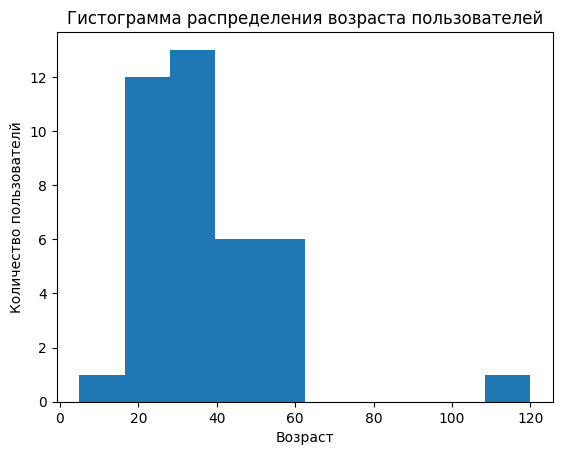

In [10]:
plt.hist(df['age'], bins=10)
plt.title('Гистограмма распределения возраста пользователей')
plt.xlabel('Возраст')
plt.ylabel('Количество пользователй')
plt.savefig('figures/fig_age_hist.png')
plt.show()

По гистограмме видно, что одна строка выбивается из общего распределения, ранее эта строка была замечена, как "подозрительная" (возраст = 120).

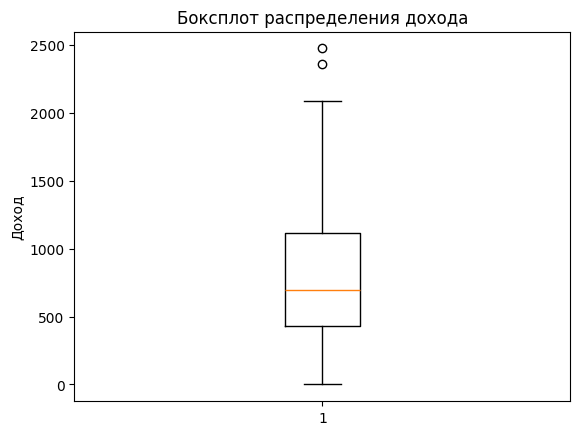

In [11]:
plt.boxplot(df['revenue'])
plt.title('Боксплот распределения дохода')
plt.ylabel('Доход')
plt.savefig('figures/fig_revenue_boxplot.png')
plt.show()

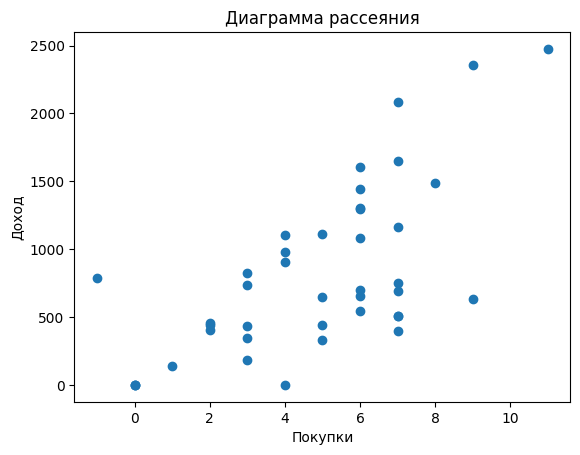

In [12]:
plt.scatter(df['purchases'], df['revenue'])
plt.title('Диаграмма рассеяния')
plt.xlabel('Покупки')
plt.ylabel('Доход')
plt.savefig('figures/fig_purchases-revenue_scatter.png')
plt.show()

Из диаграммы можно заметить среднюю тенденцию на увеличение дохода с ростом числа покупок.